In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams.update({'font.size': 16})

df = pd.read_csv("experiment_lab2p2.csv")

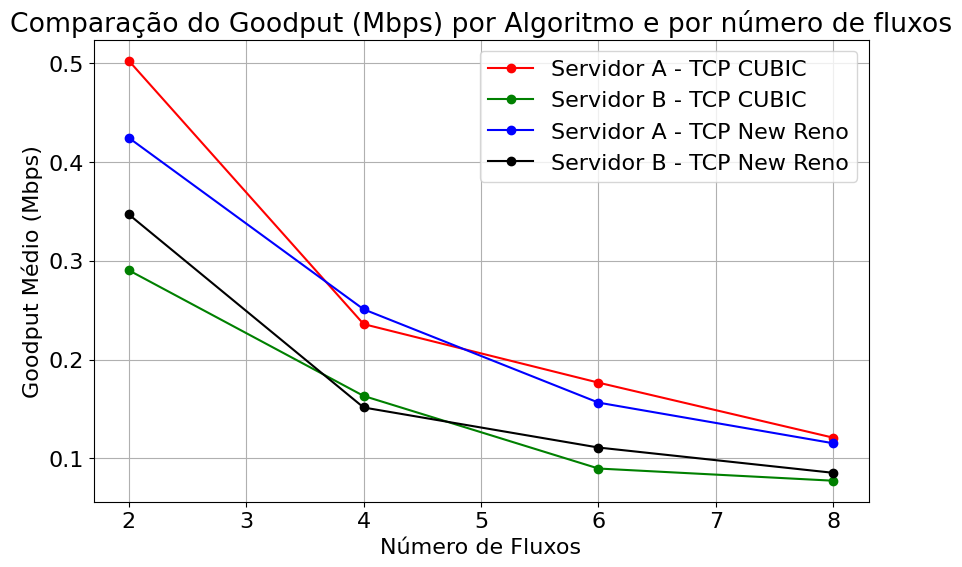

In [8]:
# media do CUBIC nflows = 2 para cada um dos servidores
mean_sa_cubic = df[df['alg'] == 'ns3::TcpCubic'].groupby(by='nflows')['media_sa'].mean().reset_index()
mean_sb_cubic = df[df['alg'] == 'ns3::TcpCubic'].groupby(by='nflows')['media_sb'].mean().reset_index()

mean_sa_newreno = df[df['alg'] == 'ns3::TcpNewReno'].groupby(by='nflows')['media_sa'].mean().reset_index()
mean_sb_newreno = df[df['alg'] == 'ns3::TcpNewReno'].groupby(by='nflows')['media_sb'].mean().reset_index()

plt.figure(figsize=(10,6))

plt.plot(mean_sa_cubic['nflows'], mean_sa_cubic['media_sa'], color="red", marker='o', label="Servidor A - TCP CUBIC")
plt.plot(mean_sb_cubic['nflows'], mean_sb_cubic['media_sb'], color="green", marker='o', label="Servidor B - TCP CUBIC")
plt.plot(mean_sa_newreno['nflows'], mean_sa_newreno['media_sa'], color="blue", marker='o', label="Servidor A - TCP New Reno")
plt.plot(mean_sb_newreno['nflows'], mean_sb_newreno['media_sb'], color="black", marker='o', label="Servidor B - TCP New Reno")

plt.title("Comparação do Goodput (Mbps) por Algoritmo e por número de fluxos")
plt.xlabel("Número de Fluxos")
plt.ylabel("Goodput Médio (Mbps)")
plt.legend()
plt.grid()
plt.show()

0.06310944999999998
0.103868045


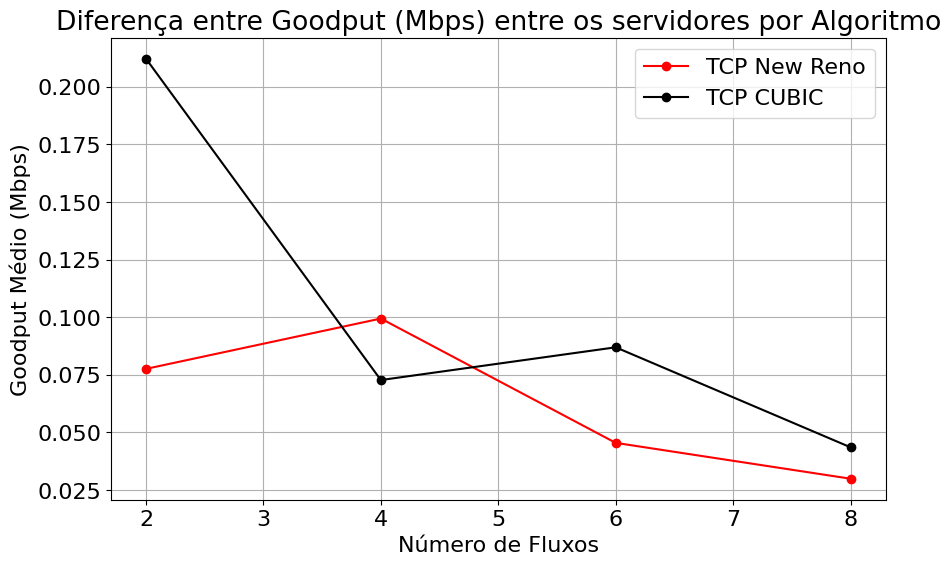

In [9]:
plt.figure(figsize=(10,6))

print(np.mean(mean_sa_newreno['media_sa'] - mean_sb_newreno['media_sb']))
print(np.mean(mean_sa_cubic['media_sa'] - mean_sb_cubic['media_sb']))

plt.plot(mean_sa_newreno['nflows'], mean_sa_newreno['media_sa'] - mean_sb_newreno['media_sb'], color="red", marker='o', label="TCP New Reno")
plt.plot(mean_sa_cubic['nflows'], mean_sa_cubic['media_sa'] - mean_sb_cubic['media_sb'], color="black", marker='o', label="TCP CUBIC")

plt.title("Diferença entre Goodput (Mbps) entre os servidores por Algoritmo")
plt.xlabel("Número de Fluxos")
plt.ylabel("Goodput Médio (Mbps)")
plt.legend()
plt.grid()
plt.show()